# WeatherPy
----

### Data Analysis and Observations Summary

1. When looking at the linear regression data for temperature in both northern and southern hemispheres, the dots on each plot show the temperatures are higher (or warmer) closest to the equator. As the latitude for both hemispheres gets farther away from the equator (or zero), the temperatures get lower (or colder). This data supports what we know about temperatures near the equator vs at either north or south pole.

2. When looking at the regression lines for wind speeds in both hemispheres, wind speeds are lower at the equator and increase as the distances extend out in both north and south directions. The increase is noted more in the southern hemisphere (higher absolute rvalue) than in the northern hemisphere (lower absolute rvalue). This may be related to warmer temperatures at the equator (see observation #1 above) where warm, moise air rises to produce low pressure resulting in little surface wind at the equator.

3. When looking at the latitude vs. temperature plot, the temperatures are highest at or near the equator. As cities get farther out from the equator, temperatures remain higher in the southern hemisphere but drop off significantly in the northern hemisphere. Land mass is distributed at 68% in the northern hemisphere and 32% in the southern hemisphere*. This distribution may account for the number of city readings or that land masses will report colder temperatures than water masses. *Source = phl.upr.edu.

4. Related to 100% Humidity -- It is possible to have humidity greater than 100%. It's known as "supersaturation". This dataset looked for instances of humidity > 100%. See the section below that inspects for cities with humidity data > 100%.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Note: Added this import to dynamically create chart titles below.
from datetime import datetime

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
# Note: Install citipy
from citipy import citipy

# Import pprint - prints JSON in a structured way
# Note: I had to install this in Get Bash
from pprint import pprint

# Note: These are optional. I may not use them.
import gmaps
import gmaps.datasets
import seaborn as sns

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = (f"{url}q={city}&appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?q=rikitea&appid=638398f7f561b24fe58df1f6395b8765&units=Imperial&q='

In [10]:
# Get weather data using requests.get
weather_response = requests.get (query_url)
weather_json = weather_response.json()
print(f"Testing weather API: {weather_json}")


Testing weather API: {'coord': {'lon': -73, 'lat': -12.1167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.68, 'feels_like': 74.61, 'temp_min': 68.68, 'temp_max': 68.68, 'pressure': 1016, 'humidity': 96, 'sea_level': 1016, 'grnd_level': 941}, 'visibility': 10000, 'wind': {'speed': 0.87, 'deg': 339}, 'clouds': {'all': 100}, 'dt': 1611505164, 'sys': {'country': 'PE', 'sunrise': 1611485001, 'sunset': 1611530681}, 'timezone': -18000, 'id': 3933104, 'name': 'Pangoa', 'cod': 200}


In [7]:
# If you want to print in json format
# pprint (weather_json)
# print(weather_json['name'])

In [9]:
# Counter to go through data
record = 0
sets = 1


# Define empty lists to store values.
# Note: Could also use dataframes vs. containers
cloudiness = []
country = []
date = []
temp = []
temp_max = []
humidity = []
lat = []
lon = []
wind_speed = []
city_name = []

# For loop through cities to make API calls using city as query
# Note: This line of code also works even though fields are out of order. Documenting here for future reference.
    #query_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=Imperial"

# Loop through city data and retrieve
print("----- Start Data Retrieval -----")


for city in cities:
    city=city
    
    query_url = url +  "&q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    response = requests.get(query_url).json()

# Pulls data and puts it into above containers. Missing data is skipped by exception below. 
    try:
        print(f"Processing record {record} of set {sets} | {city}")
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])  
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])       

    except (KeyError):
        print("City not found. skipping.")

# Note: Loops through data and when it hits record #50, it resets the counter.
# Note: Code and count idea attributed to a classmate.
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 
        
        
print("----------Done Woohoo!---------")

----- Start Data Retrieval -----
Processing record 0 of set 1 | mar del plata
Processing record 1 of set 1 | kamaishi
Processing record 2 of set 1 | hobart
Processing record 3 of set 1 | lopatino
Processing record 4 of set 1 | luderitz
Processing record 5 of set 1 | nikolskoye
Processing record 6 of set 1 | punta arenas
Processing record 7 of set 1 | grand river south east
City not found. skipping.
Processing record 8 of set 1 | quatre cocos
Processing record 9 of set 1 | guozhen
Processing record 10 of set 1 | bandarbeyla
Processing record 11 of set 1 | georgetown
Processing record 12 of set 1 | jinan
Processing record 13 of set 1 | uzhur
Processing record 14 of set 1 | bengkulu
Processing record 15 of set 1 | jacareacanga
Processing record 16 of set 1 | mataura
Processing record 17 of set 1 | ketchikan
Processing record 18 of set 1 | butaritari
Processing record 19 of set 1 | laguna
Processing record 20 of set 1 | puerto narino
Processing record 21 of set 1 | albany
Processing record

Processing record 37 of set 4 | la romana
Processing record 38 of set 4 | acin
City not found. skipping.
Processing record 39 of set 4 | saleaula
City not found. skipping.
Processing record 40 of set 4 | kaitangata
Processing record 41 of set 4 | kerki
City not found. skipping.
Processing record 42 of set 4 | kemi
Processing record 43 of set 4 | alofi
Processing record 44 of set 4 | ahipara
Processing record 45 of set 4 | wajir
Processing record 46 of set 4 | toliary
City not found. skipping.
Processing record 47 of set 4 | emilio carranza
Processing record 48 of set 4 | kiunga
Processing record 49 of set 4 | svetlogorsk
Processing record 0 of set 5 | tanjong malim
City not found. skipping.
Processing record 1 of set 5 | erdenet
Processing record 2 of set 5 | cheney
Processing record 3 of set 5 | hovd
Processing record 4 of set 5 | duzce
Processing record 5 of set 5 | lompoc
Processing record 6 of set 5 | weinan
Processing record 7 of set 5 | manzhouli
Processing record 8 of set 5 | mi

Processing record 27 of set 8 | shingu
Processing record 28 of set 8 | phuntsholing
Processing record 29 of set 8 | marsa matruh
Processing record 30 of set 8 | ciawi
Processing record 31 of set 8 | jumla
Processing record 32 of set 8 | bargal
City not found. skipping.
Processing record 33 of set 8 | doctor pedro p. pena
City not found. skipping.
Processing record 34 of set 8 | hokitika
Processing record 35 of set 8 | acatlan
Processing record 36 of set 8 | veraval
Processing record 37 of set 8 | raudeberg
Processing record 38 of set 8 | marcona
City not found. skipping.
Processing record 39 of set 8 | la mira
Processing record 40 of set 8 | chapais
Processing record 41 of set 8 | khipro
Processing record 42 of set 8 | kinablangan
Processing record 43 of set 8 | sorong
Processing record 44 of set 8 | birjand
Processing record 45 of set 8 | iskateley
Processing record 46 of set 8 | baracoa
Processing record 47 of set 8 | araioses
Processing record 48 of set 8 | gladstone
Processing reco

Processing record 16 of set 12 | yerbogachen
Processing record 17 of set 12 | karasjok
Processing record 18 of set 12 | marawi
Processing record 19 of set 12 | christchurch
Processing record 20 of set 12 | taree
Processing record 21 of set 12 | aberdeen
Processing record 22 of set 12 | haines junction
Processing record 23 of set 12 | sambava
Processing record 24 of set 12 | bhimunipatnam
Processing record 25 of set 12 | teruel
Processing record 26 of set 12 | sola
Processing record 27 of set 12 | abu samrah
Processing record 28 of set 12 | chiang kham
Processing record 29 of set 12 | pahrump
Processing record 30 of set 12 | khandyga
Processing record 31 of set 12 | sundargarh
Processing record 32 of set 12 | rognan
Processing record 33 of set 12 | safita
Processing record 34 of set 12 | lata
Processing record 35 of set 12 | alyangula
Processing record 36 of set 12 | ballina
Processing record 37 of set 12 | tapaua
City not found. skipping.
Processing record 38 of set 12 | kasangulu
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Note: Create Dataframe list of dictionaries

city_df = pd.DataFrame({
    "city": city_name,
    "country": country,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "humidity": humidity,
    "wind_speed": wind_speed,
    "cloudiness": cloudiness,
    "date": date
})

city_df.head(10)


,city,country,lat,lon,temp,temp_max,humidity,wind_speed,cloudiness,date
0,Mar del Plata,AR,-38.0023,-57.5575,89.35,89.60,40,11.50,20,1611505055
1,Kamaishi,JP,39.2667,141.8833,34.66,34.66,85,4.07,100,1611505055
2,Hobart,AU,-42.8794,147.3294,63.95,68.00,49,6.91,87,1611505055
3,Lopatino,RU,52.6195,45.8118,33.10,33.10,94,11.99,100,1611505055
4,Lüderitz,NA,-26.6481,15.1594,71.37,71.37,53,29.97,77,1611505055
5,Nikolskoye,RU,59.7035,30.7861,35.20,35.60,93,8.95,90,1611505056
6,Punta Arenas,CL,-53.1500,-70.9167,62.60,62.60,36,14.97,0,1611505056
7,Quatre Cocos,MU,-20.2078,57.7625,78.22,80.60,78,3.44,40,1611505056
8,Guozhen,CN,34.3659,107.3590,37.27,37.27,77,3.40,100,1611505056
9,Bandarbeyla,SO,9.4942,50.8122,73.87,73.87,71,19.51,25,1611505056


In [13]:
# Show Record Count
# Note: Checking the data, just curious
recordcount = len(city_df)
recordcount

566

In [14]:
#Export to CSV
city_df.to_csv("../output_data/weather_globalcities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Create dataframe to identify cities with humidty > 100.
# If identified, use city_filtered_df going forward. If not, then use city_df.

city_filtered_df = city_df[city_df["humidity"] > 100] 
  
# Print the new dataframe 
city_filtered_df.head(5) 


,city,country,lat,lon,temp,temp_max,humidity,wind_speed,cloudiness,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

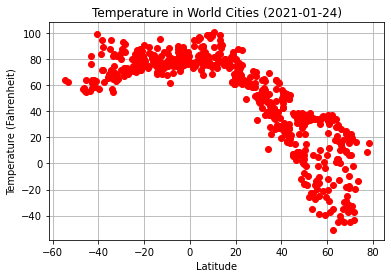

In [16]:
# Converting Date for title of plot
# Note: Dynamic field in chart title - borrowed code from H.Kaur as it is a cool addition to graphs.
timestamp = city_df["date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["temp"], marker="o", color="red", zorder=2)

# Incorporate the other graph properties
# Note: Static title option >>  plt.title("Temperature in World Cities (Jan 2021)")
plt.title(f"Temperature in World Cities ({shortened_timestamp})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

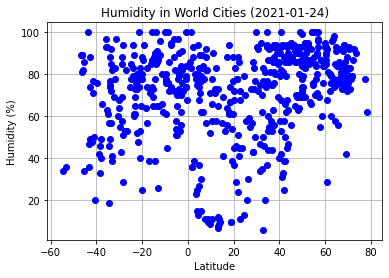

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["humidity"], marker="o", color="blue", zorder=2)

# Incorporate the other graph properties
plt.title(f"Humidity in World Cities ({shortened_timestamp})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

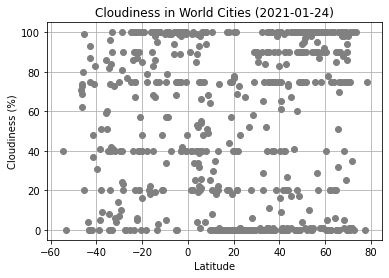

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["cloudiness"], marker="o", color="grey", zorder=2)

# Incorporate the other graph properties
plt.title(f"Cloudiness in World Cities ({shortened_timestamp})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

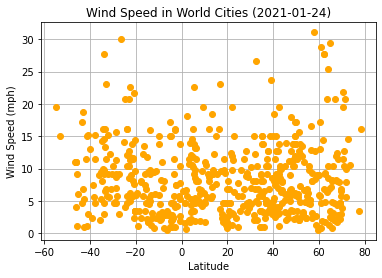

In [19]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["wind_speed"], marker="o", color="orange", zorder=2)

# Incorporate the other graph properties
plt.title(f"Wind Speed in World Cities ({shortened_timestamp})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_windspeed.png")

# Show plot
plt.show()

## Linear Regression

In [43]:
# Create a function to create Linear Regression plots
# Note: all code must be indented (even print statement); or it will error out.
# Note: def line code may or may not be needed. If used, indent all remaining code.
#def lin_reg_plot(x_values,y_values):
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Note: Code below is sample scatter plot to make sure all is working.
# Note: Add the linear regression equation and line to plot & apply some formatting
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=16,color="red")
#plt.title("Latitude Linear Regression")
#plt.xlabel("Latitude")
    
#print(f"The rvalue is: {rvalue}")
#plt.show()

In [44]:
# Create dataframes for Northern and Southern Hemisphere
northhem_df = city_df.loc[city_df["lat"] > 0,:]
#northhem_df.head()

southhem_df = city_df.loc[city_df["lat"] < 0,:]
#southhem_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: -0.8642203441143582
None


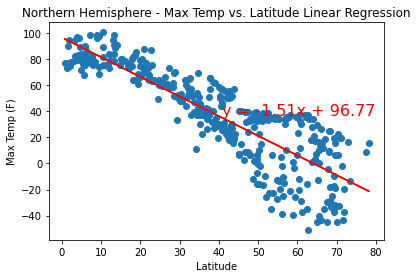

In [54]:
x_values = northhem_df["lat"]
y_values = northhem_df["temp_max"]
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp (F)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.48445556414140184
None


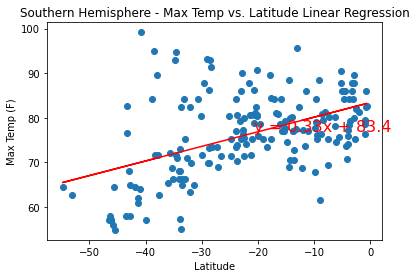

In [55]:
x_values = southhem_df["lat"]
y_values = southhem_df["temp_max"]
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp (F)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.39978401579064593
None


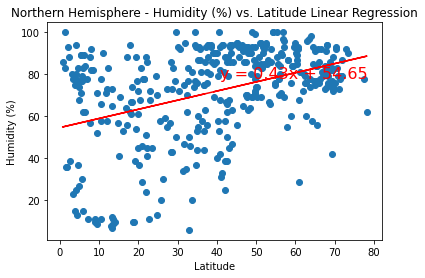

In [56]:
x_values = northhem_df["lat"]
y_values = northhem_df["humidity"]
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.24927615324823438
None


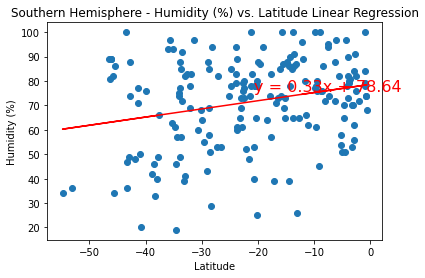

In [57]:
x_values = southhem_df["lat"]
y_values = southhem_df["humidity"]
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.2148077040409509
None


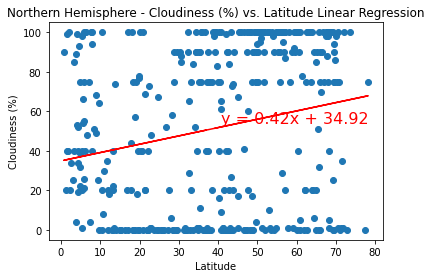

In [58]:
x_values = northhem_df["lat"]
y_values = northhem_df["cloudiness"]
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.341228670797528
None


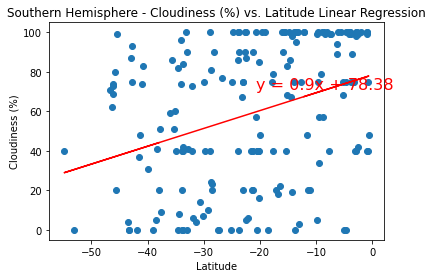

In [59]:
x_values = southhem_df["lat"]
y_values = southhem_df["cloudiness"]
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.05357416149520931
None


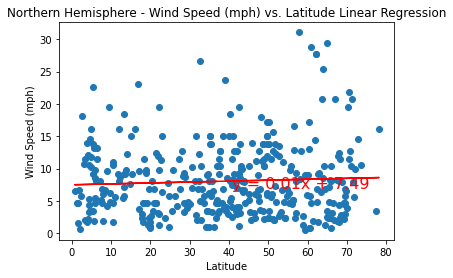

In [60]:
x_values = northhem_df["lat"]
y_values = northhem_df["wind_speed"]
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.2792185595408714
None


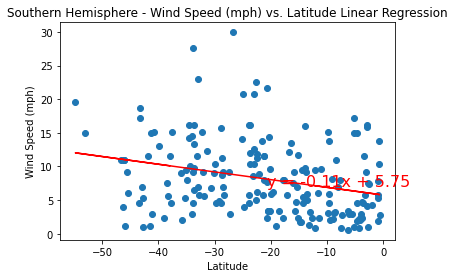

In [61]:
x_values = southhem_df["lat"]
y_values = southhem_df["wind_speed"]
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_wind.png")